The UAH-DriveSet, a public dataset that allows deep driving analysis by providing a large amount of data captured by our driving monitoring app DriveSafe. The application is run by 6 different drivers and vehicles, performing 3 different behaviors (normal, drowsy and aggressive) on two types of roads (motor- way and secondary road), resulting in more than 500 minutes of naturalistic driving with its associated raw data and processed semantic information
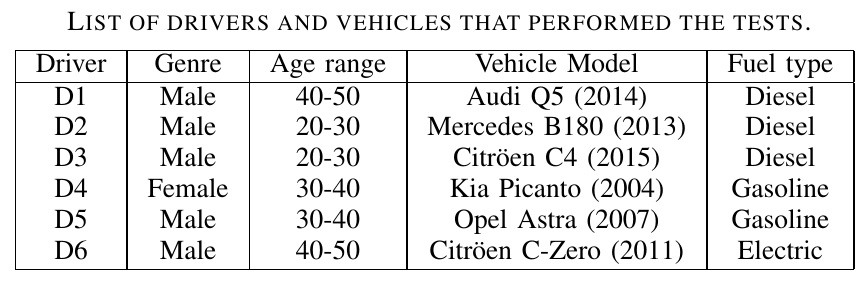


For this analysis, I will be using the dataset of driver D1. For this dataset, we have 9 files across 4 categories for each of the 7 rides as follows: 

1.   Raw real time data-  RAW GPS and RAW ACCELEROMETERS
2.   Processed data as continuous variables- PROC LANE DETECTION, PROC VEHICLE DETECTION and PROC OPENSTREETMAP DATA 
3.   Processed data as events- EVENTS LIST LANE CHANGES and EVENTS INERTIAL
4.   Semantic information- SEMANTIC FINAL and SEMANTIC ONLINE


## Raw real time data 

RAW GPS contains the data collected from GPS, at 1Hz. The contents of each column are listed below:
- Timestamp (seconds)
- Speed (km/h)
- Latitude coordinate (degrees)
- Longitude coordinate (degrees)
- Altitude (meters)
- Vertical accuracy (degrees)
- Horizontal accuracy (degrees)
- Course (degrees)
- Difcourse: course variation (degrees)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#reading the file and adding columns to it

df1= pd.read_csv('/content/RAW_GPS.txt', delimiter=' ', header = None)
df1.columns=['Timestamp', 'Speed', 'Lat', 'Long', 'Altitude','Vaccuracy','Haccuracy','Course','Difcourse','na','na','na','na']
df1=df1.iloc[:,:-4] # removing columns we don't have any information about 
df1.head()

,Timestamp,Speed,Lat,Long,Altitude,Vaccuracy,Haccuracy,Course,Difcourse
0,7.85,65.2,40.512787,-3.404477,612.7,4,5,331.9,0.000
1,8.83,64.5,40.512924,-3.404577,612.5,4,5,331.9,0.000
2,9.82,63.6,40.513065,-3.404680,612.9,4,5,330.8,1.055
3,10.80,62.2,40.513210,-3.404772,613.3,4,5,330.8,1.055
4,11.80,60.9,40.513348,-3.404868,613.5,3,5,330.1,0.703


In [ ]:
print(df1['Haccuracy'].unique()) # remains constant throughout 
print(df1['Vaccuracy'].unique()) #don't add much value and can be removed 

#Course and difcourse helps in determining accuracy of GPS 

[5]
[4 3 6 8]


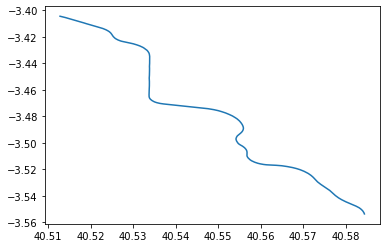

In [ ]:
#Journey route
plt.plot(df1['Lat'],df1['Long'])
#different starting and ending points

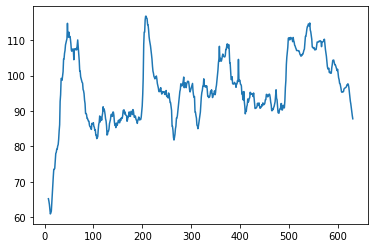

In [ ]:
plt.plot(df1['Timestamp'],df1['Speed'])
#non uniform speed changing with time due to various factors such as breaking, turning. We can possibly see that later

In [ ]:
gps=df1.iloc[:,:-4] #dataset with only required features

Similarly, reading the next file which has Raw accelerometer data

- Timestamp (seconds)
- Boolean of system activated (1 if >50km/h) 
- Acceleration in X (Gs)
- Acceleration in Y (Gs)
- Acceleration in Z (Gs)
- Acceleration in X filtered by KF (Gs)
- Acceleration in Y filtered by KF (Gs)
- Acceleration in Z filtered by KF (Gs)
- Roll (degrees) 
- Pitch (degrees) 
- Yaw (degrees)

In [ ]:
df2= pd.read_csv('/content/RAW_ACCELEROMETERS.txt', delimiter=' ', header = None)
df2.columns=['Timestamp','Status','Acc_X','Acc_Y','Acc_Z','Acc_X_KF','Acc_Y_KF','Acc_Z_KF','Roll','Pitch','Yaw','na']
df2=df2.iloc[:,:-1]
df2.head()

,Timestamp,Status,Acc_X,Acc_Y,Acc_Z,Acc_X_KF,Acc_Y_KF,Acc_Z_KF,Roll,Pitch,Yaw
0,6.94,1,0.017,-0.011,0.018,-0.005,0.008,0.018,-1.523,0.015,0.012
1,7.03,1,0.046,0.007,0.019,0.016,-0.002,0.018,-1.522,0.012,0.012
2,7.14,1,0.052,-0.016,0.027,0.037,-0.005,0.018,-1.520,0.014,0.011
3,7.24,1,0.015,-0.016,0.026,0.038,-0.009,0.024,-1.523,0.014,0.011
4,7.34,1,-0.014,-0.017,0.040,0.012,-0.016,0.032,-1.525,0.012,0.011


In [ ]:
df2.shape

(6170, 11)

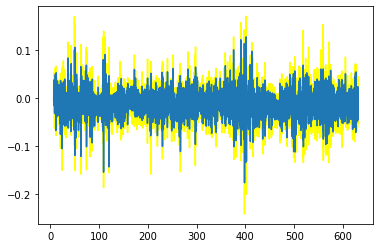

In [ ]:
#Status remains active throughout, can delete that column
#Showing the effect of KF (Kalman Filter)

plt.plot(df2['Timestamp'],df2['Acc_X'], color='yellow')
plt.plot(df2['Timestamp'],df2['Acc_X_KF'])

#So it is the same trend and we don't require two different values for acceleration, only using KF values

In [ ]:
#Getting the Acceleration as a single value
import math
def magnitude(vector): 
    return math.sqrt(sum(pow(element, 2) for element in vector))

acc=[]

for i in range(0, len(df2)):
  vector=np.array([df2['Acc_X_KF'][i],df2['Acc_Y_KF'][i],df2['Acc_Z_KF'][i]])
  acc.append(magnitude(vector))
df2['Acceleration']=acc

In [ ]:
df2.head()

,Timestamp,Status,Acc_X,Acc_Y,Acc_Z,Acc_X_KF,Acc_Y_KF,Acc_Z_KF,Roll,Pitch,Yaw,Acceleration
0,6.94,1,0.017,-0.011,0.018,-0.005,0.008,0.018,-1.523,0.015,0.012,0.020322
1,7.03,1,0.046,0.007,0.019,0.016,-0.002,0.018,-1.522,0.012,0.012,0.024166
2,7.14,1,0.052,-0.016,0.027,0.037,-0.005,0.018,-1.520,0.014,0.011,0.041449
3,7.24,1,0.015,-0.016,0.026,0.038,-0.009,0.024,-1.523,0.014,0.011,0.045837
4,7.34,1,-0.014,-0.017,0.040,0.012,-0.016,0.032,-1.525,0.012,0.011,0.037736


In [ ]:
accelerometer=df2.loc[:,['Timestamp','Acceleration']] #dataset with only required features

Roll, pitch and yaw are calculates using value of acceleration across 3 axis. So, skipping that, we have a dataset that provides us with magnitude of log value of acceleraion. Now, I am going to use **LEFT JOIN** to have all the data from df1 but only the necessary value from df2 as they are not of the same shape. 

In [ ]:
np.sum(pd.merge(df1,df2,on='Timestamp',how='left').isnull())

#However, 90% of timestamps don't match and we can't proceed with this.
#Let's look at more data to find some insights

Timestamp         0
Speed             0
Lat               0
Long              0
Altitude          0
Vaccuracy         0
Haccuracy         0
Course            0
Difcourse         0
Status          580
Acc_X           580
Acc_Y           580
Acc_Z           580
Acc_X_KF        580
Acc_Y_KF        580
Acc_Z_KF        580
Roll            580
Pitch           580
Yaw             580
Acceleration    580
dtype: int64

##Processed Data

Three files, whose name starts by “PROC”, contain variables that are processed in real-time by DriveSafe App in a continuous way. These files conatin data about lane detection and vehicle detection continuously. I am going to skip processing these files as the necessary parameters of this file are provided in the upcoming files.

## Processed data as events

This has the summarised results of the processed data in two forms- lane changes and inertial events

In [ ]:
#list lane change data
df3=pd.read_csv('/content/EVENTS_LIST_LANE_CHANGES.txt', delimiter=' ', header = None)
df3.columns=['Timestamp','Type','Lat','Long','Duration','Threshold']
df3

,Timestamp,Type,Lat,Long,Duration,Threshold
0,16.43,-2,40.514019,-3.405443,1.88,1.5
1,31.48,-1,40.516453,-3.407653,1.00,1.5
2,37.56,-1,40.517643,-3.408758,0.97,1.5
3,50.63,1,40.520458,-3.411503,0.90,1.5
4,201.09,-2,40.533817,-3.449281,1.57,1.5
5,208.26,1,40.533802,-3.451859,0.70,1.5


Type [+ indicates right and - left, 1 indicates
normal lane change and 2 slow lane change]. Creating new columns containing one hot encoded values for the same.

Time threshold to consider irregular change(secs.) [slow if change duration is over this threshold and
fast if duration is lower than threshold/3]

In [ ]:
df3['L/R']= 0 # 1 if left, 0 if right lane
df3['Change']=0 # 1- normal change, 2-slow change, 0-fast change


In [ ]:
for i in range(0, len(df3)):
  if(df3['Type'][i]>0):
    df3['L/R'][i]=0
  else:
    df3['L/R'][i]=1
  df3['Change'][i]=abs(df3['Type'][i])

In [ ]:
lane=df3.loc[:,['Timestamp','Lat','Long','Duration','L/R','Change']]

In [ ]:
#inertial change data
df4=pd.read_csv('/content/EVENTS_INERTIAL.txt', delimiter=' ', header = None)
df4.columns=['Timestamp','Type','Level','Lat','Long','Date','na']
df4=df4.iloc[:,:-1]
df4

,Timestamp,Type,Level,Lat,Long,Date
0,26.14,2,1,40.515564,-3.406911,20151110175738
1,206.78,2,1,40.533783,-3.451114,20151110180038
2,458.92,2,1,40.557392,-3.512532,20151110180451


Type (1=braking, 2=turning, 3=acceleration)
Level (1=low, 2=medium, 3=high)

In [ ]:
#converting the Date column into standard type
df4['Date'] = pd.to_datetime(df4['Date'], format='%Y%m%d%H%M%S')

## Semantic Information

From all the mentioned variables, DriveSafe evaluates a series of maneuvers in a mid-level semantic step and scores them according to a general behavior pattern obtained in a heuristic way

In [ ]:
df3.columns=['Timestamp','Lat','Long','Total_W','Acc_W','Brakings_W','Turnings_W','Weaving_W','Drifting_W','OS_W','Car_W','normal_W','drowsy_W','aggressive_W','distracted_W',
             'Total','Acc','Brakings','Turnings','Weaving','Drifting','OS','Car','normal','drowsy','aggressive','distracted','na']
    df3=df3.iloc[:,:-1]

The "_W" scores are the scores estimated for the last minute (60 seconds) during the route, and the other scores are estimated as the score since the route start until that time in the route 

In [ ]:
#Adding speed to the dataset from gps data 
df5=pd.concat([df5, gps['Speed']],axis=1)

In [ ]:
for col in df5.columns:
    if len(df5[col].unique()) == 1:
        df5.drop(col,inplace=True,axis=1)

In [ ]:
#Columns having same value. Dropping them
df5=df5.drop(columns=['Acc_W', 'Brakings_W', 'Weaving_W', 'distracted_W', 'Acc', 'Brakings', 'Weaving','distracted'])

In [ ]:
#As drowsy, normal and aggressive columns show the ratio of driver being in that mood, the 3 values sum to 1 and we can drop normal value to avoid dummy trap
df5=df5.drop(columns=['normal_W','normal'])

In [ ]:
#See relation between the _W columns and rest of the columns
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df5.corr(), ax=ax, annot=True)

#Nothing singnificant 

In [ ]:
#Left joining with acceleration table
accelerometer['Timestamp']=round(accelerometer['Timestamp'],1)
final=pd.merge(df5,accelerometer,on='Timestamp',how='left')


In [ ]:
final.tail()

,Timestamp,Lat,Long,Total_W,Turnings_W,Drifting_W,OS_W,Car_W,drowsy_W,aggressive_W,Total,Turnings,Drifting,OS,Car,drowsy,aggressive,Speed,Acceleration
674,627.8,40.584324,-3.552810,88.8,86.7,63.4,73.1,98.5,0.146,0.209,89.6,100.0,65.6,61.3,100.0,0.138,0.129,90.8,0.059042
675,628.8,40.584354,-3.553110,88.8,86.7,63.4,73.1,98.5,0.147,0.209,89.6,100.0,64.5,63.0,100.0,0.142,0.123,89.7,0.021119
676,629.8,40.584393,-3.553401,88.8,86.8,63.4,73.2,98.5,0.147,0.209,89.9,100.0,63.7,65.7,100.0,0.145,0.114,88.7,0.037908
677,630.8,40.584435,-3.553698,88.8,86.8,63.3,73.2,98.5,0.147,0.209,90.0,100.0,63.7,66.2,100.0,0.145,0.113,87.8,0.062777
678,630.8,40.584435,-3.553698,88.8,86.8,63.3,73.2,98.5,0.147,0.209,90.0,100.0,63.7,66.2,100.0,0.145,0.113,87.8,0.055045


# Data Exploration

In [ ]:
import os
datasets_folder='/content/drive/MyDrive/D1' 

In [ ]:
# Returns all loaded datasets
def getDatasets():

    uah = {}
    
    for i in range(1,8):
    
        folder = os.path.join(datasets_folder, "R" + str(i))
        gps = pd.read_csv(os.path.join(folder, 'RAW_GPS.txt'), delimiter=' ', header = None)
        accelerometer = pd.read_csv(os.path.join(folder, 'RAW_ACCELEROMETERS.txt'), delimiter=' ', header = None)
        semantic = pd.read_csv(os.path.join(folder, 'SEMANTIC_ONLINE.txt'), delimiter=' ', header = None)

        uah["uah_" + str(i)] = {
            "gps": gps,
            "acc": accelerometer,
            "semantic": semantic
        }
    return uah

In [ ]:
datasets = getDatasets() 

In [ ]:
#for getting acceleration
import math
def magnitude(vector): 
    return math.sqrt(sum(pow(element, 2) for element in vector))



I have created a function that does all the preprocessing work on the 3 datasets to give one final dataframe for each ride. I have made sure that there are no columns that make the data redundant. The result is a list of dataframes. 

In [ ]:
# Preprocesses all the files to get a final dataset
def preprocess():

  final=[]

  for uah in range(1,8):
    data = datasets["uah_" + str(uah)]

    df1= data["gps"] #first file
    df1.columns=['Timestamp', 'Speed', 'Lat', 'Long', 'Altitude','Vaccuracy','Haccuracy','Course','Difcourse','na','na','na','na']
    df1=df1.iloc[:,:-8] 

    df2= data["acc"] #second file
    df2.columns=['Timestamp','Status','Acc_X','Acc_Y','Acc_Z','Acc_X_KF','Acc_Y_KF','Acc_Z_KF','Roll','Pitch','Yaw','na']
    df2=df2.iloc[:,:-1]

    accr=[] #calculating acceleration
    for i in range(0, len(df2)):
      vector=np.array([df2['Acc_X_KF'][i],df2['Acc_Y_KF'][i],df2['Acc_Z_KF'][i]])
      accr.append(magnitude(vector))
    df2['Acceleration']=accr

    df2=df2.loc[:,['Timestamp','Acceleration']]

    df3= data["semantic"] #third file
    df3.columns=['Timestamp','Lat','Long','Total_W','Acc_W','Brakings_W','Turnings_W','Weaving_W','Drifting_W','OS_W','Car_W','normal_W','drowsy_W','aggressive_W','distracted_W',
             'Total','Acc','Brakings','Turnings','Weaving','Drifting','OS','Car','normal','drowsy','aggressive','distracted','na']
    df3=df3.iloc[:,:-1]
    df3=df3.drop(columns=['normal_W','normal'])
    for col in df3.columns: #dropping columns with only 1 unique value
      if len(df3[col].unique()) == 1:
        df3.drop(col,inplace=True,axis=1)

    df2['Timestamp']=round(df2['Timestamp'],1)
    df1['Timestamp']=round(df1['Timestamp'],1)
    df3=pd.merge(df3,df1,on='Timestamp',how='left') 
    df3=df3.drop(columns=['Lat_y','Long_y','Altitude'])
    res=pd.merge(df3,df2,on='Timestamp',how='left') #merging the 3 dataframes
    res=res.ffill() #handling missing data 

    final.append(res)

  return final




In [ ]:
data=preprocess()

Resultant files:

- data[0]= Normal driving, secondary road (16 km)
- data[1]= Normal driving return, secondary road (16 km)
- data[2]= Normal driving, motorway road (25 km)
- data[3]= Aggressive driving, motorway road (24 km)
- data[4]= drowsy driving, motorway road (25 km)
- data[5]= aggressive driving, secondary road (16 km)
- data[6]= drowsy driving, secondary road (13 km)


In [ ]:
df={ "normal_sec" :data[0], "normal_motor": data[2], "agg_sec": data[5], "agg_motor": data[3], "drowsy_sec": data[6], "drowsy_motor":data[4]}

In [ ]:
for i in df:
  print(i,df[i].shape)

#Shape of all datasets. 

normal_sec (679, 19)
normal_motor (901, 25)
agg_sec (563, 23)
agg_motor (735, 21)
drowsy_sec (501, 21)
drowsy_motor (1025, 25)


In [ ]:
df["normal_motor"].columns

Index(['Timestamp', 'Lat_x', 'Long_x', 'Total_W', 'Brakings_W', 'Turnings_W',
       'Weaving_W', 'Drifting_W', 'OS_W', 'Car_W', 'drowsy_W', 'aggressive_W',
       'distracted_W', 'Total', 'Brakings', 'Turnings', 'Weaving', 'Drifting',
       'OS', 'Car', 'drowsy', 'aggressive', 'distracted', 'Speed',
       'Acceleration'],
      dtype='object')

_W columns mean the score(example: brakings score) calculated in last 60 sec from that time (like 120 to 180 sec). Whereas, normal columns represent the score calculated till that time (i.e. 0 to 180 sec). These values are somewhat related but don't show a strong correlation. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0.5, 1.0, 'Speed on secondary road')

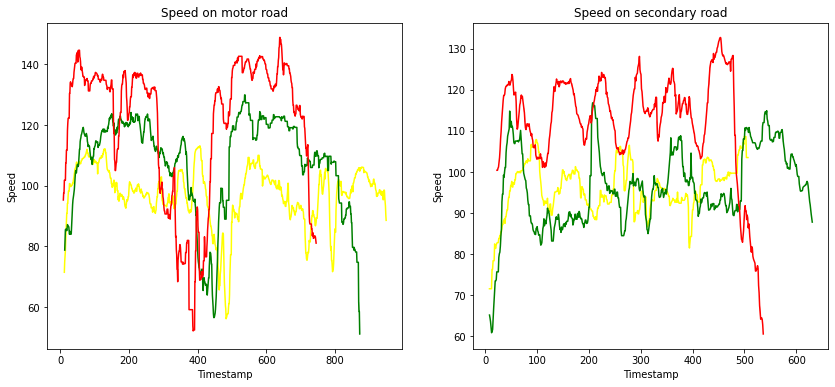

In [ ]:
#Speed trends 

fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(121)
sns.lineplot(df["drowsy_motor"]['Timestamp'], df["drowsy_motor"]['Speed'], color='yellow',ax=ax)
sns.lineplot(df["normal_motor"]['Timestamp'], df["normal_motor"]['Speed'], color='green',ax=ax)
sns.lineplot(df["agg_motor"]['Timestamp'], df["agg_motor"]['Speed'], color='red',ax=ax)
ax.set_title('Speed on motor road')

ax = fig.add_subplot(122)
sns.lineplot(df["drowsy_sec"]['Timestamp'], df["drowsy_sec"]['Speed'], color='yellow',ax=ax)
sns.lineplot(df["normal_sec"]['Timestamp'], df["normal_sec"]['Speed'], color='green',ax=ax)
sns.lineplot(df["agg_sec"]['Timestamp'], df["agg_sec"]['Speed'], color='red',ax=ax)
ax.set_title('Speed on secondary road')

#As expected, aggressive driver has highest speed and drowsy has the lowest at times. Normal driving finds a mid way
#More sharp changes (maybe due to braking or turning) in case of aggressive

In [ ]:
#checking for overspeeding

fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(121)
sns.lineplot(df["drowsy_motor"]['Timestamp'], df["drowsy_motor"]['OS'], color='yellow',ax=ax)
sns.lineplot(df["normal_motor"]['Timestamp'], df["normal_motor"]['OS'], color='green',ax=ax)
sns.lineplot(df["agg_motor"]['Timestamp'], df["agg_motor"]['OS'], color='red',ax=ax)
ax.set_title('Overspeeding on motor road')

ax = fig.add_subplot(122)
sns.lineplot(df["drowsy_sec"]['Timestamp'], df["drowsy_sec"]['OS'], color='yellow',ax=ax)
sns.lineplot(df["normal_sec"]['Timestamp'], df["normal_sec"]['OS'], color='green',ax=ax)
sns.lineplot(df["agg_sec"]['Timestamp'], df["agg_sec"]['OS'], color='red',ax=ax)
ax.set_title('Overspeeding on secondary road')


The data shows Overspeeding score. A perfect score of 100 means no overspeeding. However, the score close to 0 represents maximum overspeeding. Red lines show aggressive driving and drowsy, normal showm by yellow and green are close to perfect, representing ideal behaviour. 

###Goal: Clustering to gain insights from data for rides in all 6 conditions

In [ ]:
df["drowsy_motor"].head()

,Timestamp,Lat_x,Long_x,Total_W,Brakings_W,Turnings_W,Weaving_W,Drifting_W,OS_W,Car_W,drowsy_W,aggressive_W,distracted_W,Total,Brakings,Turnings,Weaving,Drifting,OS,Car,drowsy,aggressive,distracted,Speed,Acceleration
0,10.8,40.505222,-3.353082,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN,0.0,0.0,0.008246
1,10.8,40.505222,-3.353082,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN,0.0,0.0,0.020736
2,11.8,40.505733,-3.355593,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,71.5,0.010050
3,11.8,40.505733,-3.355593,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,71.5,0.009798
4,12.8,40.505779,-3.355771,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,74.9,0.047812


In [ ]:
df["drowsy_motor"].describe()

,Timestamp,Lat_x,Long_x,Total_W,Brakings_W,Turnings_W,Weaving_W,Drifting_W,OS_W,Car_W,drowsy_W,aggressive_W,distracted_W,Total,Brakings,Turnings,Weaving,Drifting,OS,Car,drowsy,aggressive,distracted,Speed,Acceleration
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1023.000000,1023.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1023.000000,1023.000000,1025.000000,1025.000000,1025.000000
mean,478.937561,40.479201,-3.420916,72.149659,60.506732,78.920098,19.015902,49.635902,98.183317,98.792000,0.593116,0.113872,0.011707,83.623707,82.685073,88.974049,59.934829,59.548098,97.075220,97.152098,0.419811,0.089147,0.011707,97.048878,0.031013
std,271.978676,0.013879,0.037844,9.998595,34.517717,21.091372,19.884366,7.953666,1.816473,1.025216,0.113912,0.019242,0.107618,10.278179,34.538608,30.574673,48.938410,16.248845,9.086992,8.438168,0.231170,0.072502,0.107618,10.810471,0.025639
min,10.800000,40.463497,-3.487961,58.000000,10.000000,41.600000,0.000000,43.000000,95.200000,96.800000,0.000000,0.000000,0.000000,51.400000,0.000000,0.000000,0.000000,20.400000,55.000000,61.800000,0.000000,0.000000,0.000000,0.000000,0.002236
25%,242.800000,40.467030,-3.453047,62.400000,28.500000,60.300000,7.700000,45.300000,96.500000,98.300000,0.587000,0.106000,0.000000,78.600000,76.500000,100.000000,0.000000,47.400000,100.000000,100.000000,0.178000,0.044500,0.000000,93.300000,0.017029
50%,477.800000,40.473156,-3.416795,67.300000,38.000000,88.000000,14.300000,48.100000,98.600000,99.200000,0.615000,0.119000,0.000000,81.800000,100.000000,100.000000,100.000000,63.600000,100.000000,100.000000,0.387000,0.081000,0.000000,98.400000,0.025456
75%,716.800000,40.491421,-3.390220,79.900000,100.000000,100.000000,20.000000,50.700000,100.000000,99.500000,0.651000,0.123000,0.000000,91.700000,100.000000,100.000000,100.000000,72.100000,100.000000,100.000000,0.669500,0.113500,0.000000,104.100000,0.036083
max,948.800000,40.505970,-3.353082,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.707000,0.150000,1.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.740000,0.322000,1.000000,113.100000,0.305146


In [ ]:
from sklearn.cluster import KMeans

def kmeans_cluster(df, n_clusters):
    model = KMeans(n_clusters, random_state=0)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

def summarize_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    return cluster_summary

In [ ]:
df["drowsy_motor"]=df["drowsy_motor"].dropna()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


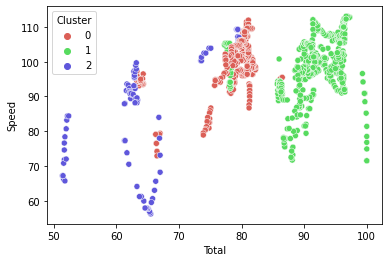

In [ ]:
cluster_columns=['Total','Brakings','Turnings','Weaving','Drifting','OS','Car','drowsy','aggressive','distracted','Speed','Acceleration']

clusters = pd.DataFrame(df["drowsy_motor"], columns=cluster_columns)


cluster_results = kmeans_cluster(clusters, 3)
sns.scatterplot(cluster_results['Total'], cluster_results['Speed'], hue=cluster_results['Cluster'], 
                palette=sns.color_palette('hls', 3))

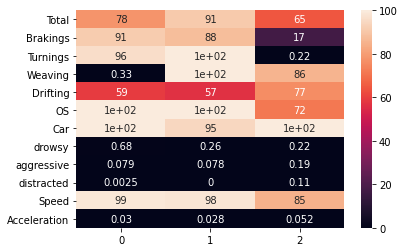

In [ ]:
cluster_summary = summarize_clustering(cluster_results)
sns.heatmap(cluster_summary[cluster_columns].transpose(), annot=True)

#Summary 

1. 6 dataset folders- 9 files each. Working on 3 files having the most of the parameters
*   GPS data- Using only latitude, longitude, speed and altitude from it
*   Accelerometer data- Pure Acceleration and one after passing through KF filter given. Calculated the magnitude of acceleration
*   Semantics data- 2 types of data given (explained in that Semantics section). Analysed their relation and dropped redundant columns

2. Created a dictionary of datasets for all 6 rides. Applied all the preprocessing as mentioned in step 1 to get the final datasets. Merged the datasets and handled missing values (final df)

3. For every final df, identified parameters with highly outlying data and used the other paramters for clustering to see the nature of the data

4. Presenting final insights and visualisations



In [ ]:
for i in df:
  print(i,df[i]['Speed'].mean())

#Avergae speed of all rides

normal_sec 96.26848306332838
normal_motor 107.6955604883461
agg_sec 112.14777975133218
agg_motor 120.67224489795902
drowsy_sec 95.93892215568862
drowsy_motor 97.23861192570875


In [ ]:
for i in df:  
  print(i,df[i]['Total'].min())

#Score indicating rash driving (more the score, better driving conditions)

normal_sec 70.3
normal_motor 62.9
agg_sec 50.4
agg_motor 61.8
drowsy_sec 56.3
drowsy_motor 51.4


**Result of clustering**

normal_secondary- Data is very continous, no change detected as clusters are very similar

normal_motor- On the basis of turning and breaking, two different behaviours noticed

aggressive_secondary- Two very distinct behaviours- low v/s high turning, breaking, drifting and overspeeding

aggressive_motor- Very similar behaviour except in terms of braking

drowsy_secondary- Two distinct behaviours- low v/s high turning, breaking and drifting 

drowsy_motor- 3 little distint behaviours on the basis of braking, turnings and weavings


---



**Conclusion**

In normal driving conditions, data was fairly normal. Only breaking and turning detected (more on motor roads). Moderate speed.

In drowsy driving conditions, no continous behaviour was seen. Turns, brakes, lane changes and drifts appeared often on both road conditions. Lowest speed.

In aggressive driving conditions, very distinct behaviours were noticed at times in terms of sharp turns, sudden breaks and drifts. Highest speed. 

*   Aggressive driving on secondary roads most risky in terms of vehicle wear off
*   Normal driving on secondary roads preferred




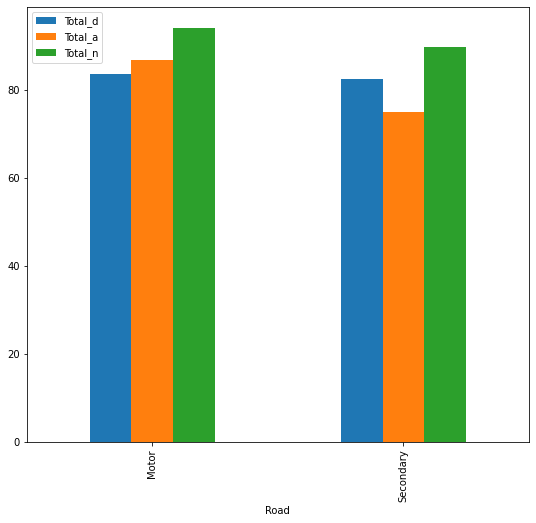

In [ ]:
sample=[["Motor",df["drowsy_motor"]['Total'].mean(),df["agg_motor"]['Total'].mean(),df["normal_motor"]['Total'].mean()],
        ["Secondary",df["drowsy_sec"]['Total'].mean(),df["agg_sec"]['Total'].mean(),df["normal_sec"]['Total'].mean()]
      
     ]

sample_df=pd.DataFrame(sample,columns=["Road","Total_d","Total_a","Total_n"])
sample_df.plot(x="Road", y=["Total_d","Total_a","Total_n"], kind="bar",figsize=(9,8))
plt.show()

#Greater the value, better the vehicle and driving condition

#Clustering

First of all, I will be using the dataset for normal driving on a motor road. As given in the data, driver shows 3 behaviours: normal, aggressive and drowsy. Using clustering can help us uncover different driver vehicle from what is expected.

In [ ]:
#Necessary libraries
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from numpy import unique
from numpy import where
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import FeatureAgglomeration
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score

In [ ]:
#loading dataset
sample=df["normal_motor"]

#checking for correlation to select features
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(sample.corr(), cmap="YlGnBu", annot=True, ax=ax)

#Dropping highly correlated features
sample=sample.drop(columns=['distracted_W','Lat_x','Brakings_W','Turnings_W','Weaving_W','Brakings','Turnings','OS','Drifting'])

Trying different clustering algorithms: 

- KMeans 
- Cosine K-Means
- Affinity Propogation- suitable for small and medium sized datasets. Chooses the number of clusters itself
- Agglomerative Clustering- hierarchical clustering. Have to select number of clusters. 4 different linkage criterias
- FeatureAgglomeration and then hierarchical clustering: merges features 
- Mean shift clustering to see probable number of clusters 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

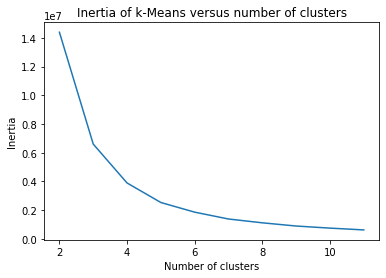

In [ ]:
#KMeans
scores = [KMeans(n_clusters=i+2).fit(sample).inertia_ 
          for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")
#4 or 5 clusters

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


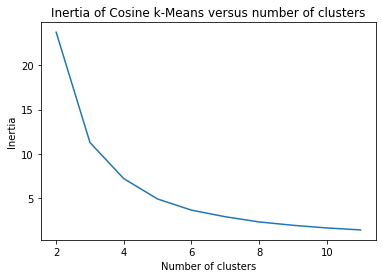

In [ ]:
#Cosine KMeans
normalized_vectors = preprocessing.normalize(sample)
scores = [KMeans(n_clusters=i+2).fit(normalized_vectors).inertia_  
          for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means versus number of clusters")
plt.savefig("intertia_cosine_kmeans.jpg", dpi=300)
#4 or 5 clusters

In [ ]:
pca = PCA(2)
X = pca.fit_transform(sample)

In [ ]:
def plot(yhat,title):
  clusters = unique(yhat)
  for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1],label=cluster)
  plt.legend()
  plt.title(title)
  plt.show()

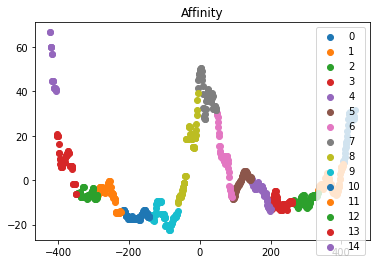

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


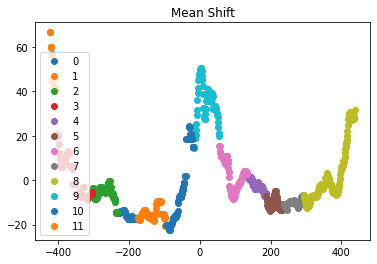

In [ ]:
#Both the algorithms that select the number of clusters on their own 
affinity = AffinityPropagation(damping=0.7)
affinity.fit(sample)
yhat = affinity.predict(sample)
plot(yhat,"Affinity")

#This algorithm does not produce much useful results as it clusters datsets probably on timestamp or basis of speed-damping >0.7
ax = fig.add_subplot(212)
bandwidth = estimate_bandwidth(sample, quantile=0.1)
model = MeanShift(bandwidth)
yhat = model.fit_predict(sample)
plot(yhat,"Mean Shift")


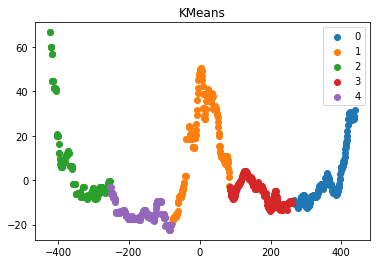

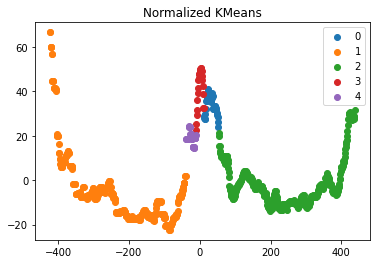

In [ ]:
###KMEANS
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(sample)
u_labels = np.unique(kmeans.labels_)
for i in u_labels:
    plt.scatter(X[kmeans.labels_ == i , 0] , X[kmeans.labels_ == i , 1] , label = i)
plt.legend()
plt.title("KMeans")
plt.show()

##COSINE KMEANS
normalized_vectors = preprocessing.normalize(X)
normalized_kmeans = KMeans(n_clusters=5).fit(normalized_vectors)
u_labels = np.unique(normalized_kmeans.labels_)
for i in u_labels:
    plt.scatter(X[normalized_kmeans.labels_ == i , 0] , X[normalized_kmeans.labels_ == i , 1] , label = i)
plt.legend()
plt.title("Normalized KMeans")
plt.show()

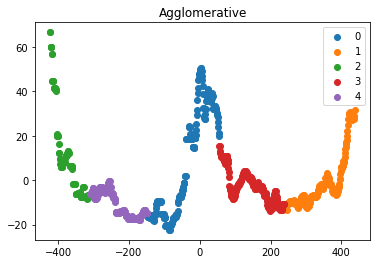

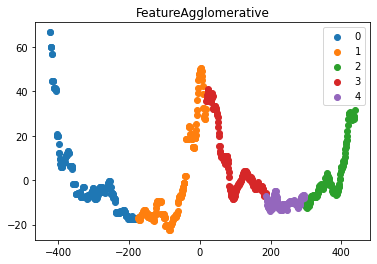

In [ ]:
###AGGLOMERATIVE
agglo = AgglomerativeClustering(n_clusters=5, linkage='average')
yhat = agglo.fit_predict(sample)
plot(yhat,"Agglomerative")

#Similar results as KMeans

#Trying feature agglomeration to merge features instead of PCA
fagglo = FeatureAgglomeration(n_clusters=2)
fagglo.fit(sample)
X_reduced = fagglo.transform(sample)

model = AgglomerativeClustering(n_clusters=5, linkage='average')
yhat = model.fit_predict(X_reduced)
plot(yhat,"FeatureAgglomerative")

**As there is a confusion regarding number of clusters and the best fit algorithm, I am using silhouette score as a metric**

In [ ]:
# Print results
print('kmeans: {}'.format(silhouette_score(sample, kmeans.labels_, 
                                           metric='euclidean')))
print('Cosine kmeans:{}'.format(silhouette_score(normalized_vectors,
                                          normalized_kmeans.labels_,
                                          metric='cosine')))
print('Agglomerative: {}'.format(silhouette_score(sample, agglo.labels_)))
print('Mean shift: {}'.format(silhouette_score(sample, model.labels_)))




kmeans: 0.5418498008135075
Cosine kmeans:0.9572734909021944
Agglomerative: 0.524687829367029
Mean shift: 0.5198052556572478


**Clear Winner is Cosine KMeans Clustering**

In [ ]:
sample.columns

Index(['Timestamp', 'Long_x', 'Total_W', 'Drifting_W', 'OS_W', 'Car_W',
       'drowsy_W', 'aggressive_W', 'Total', 'Weaving', 'Car', 'drowsy',
       'aggressive', 'distracted', 'Speed', 'Acceleration'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0.5, 1.0, 'Drowsy v/s Speed')

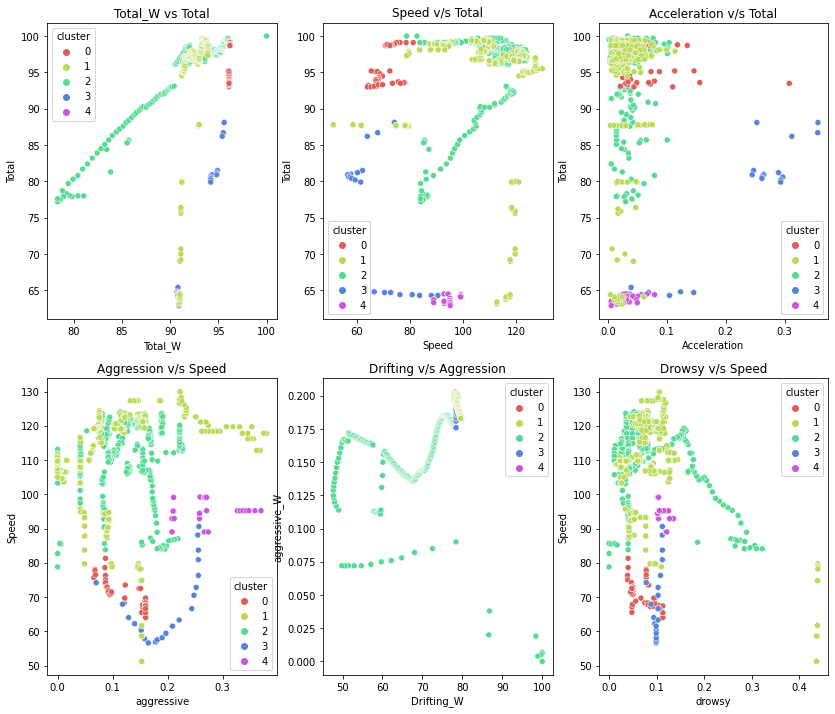

In [ ]:
sample['cluster']=normalized_kmeans.labels_

fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(231)
x=sample['Total_W'] 
y=sample['Total']
sns.scatterplot(x, y, hue=sample['cluster'], 
                palette=sns.color_palette('hls', 5), ax=ax)
ax.set_title("Total_W vs Total")

ax = fig.add_subplot(232)
x=sample['Speed'] 
y=sample['Total']
sns.scatterplot(x, y, hue=sample['cluster'], 
                palette=sns.color_palette('hls', 5), ax=ax)
ax.set_title("Speed v/s Total")

ax = fig.add_subplot(233)
x=sample['Acceleration'] 
y=sample['Total']
sns.scatterplot(x, y, hue=sample['cluster'], 
                palette=sns.color_palette('hls', 5), ax=ax)
ax.set_title("Acceleration v/s Total")

ax = fig.add_subplot(234)
x=sample['aggressive'] 
y=sample['Speed']
sns.scatterplot(x, y, hue=sample['cluster'], 
                palette=sns.color_palette('hls', 5), ax=ax)
ax.set_title("Aggression v/s Speed")

ax = fig.add_subplot(235)
x=sample['Drifting_W'] 
y=sample['aggressive_W']
sns.scatterplot(x, y, hue=sample['cluster'], 
                palette=sns.color_palette('hls', 5), ax=ax)
ax.set_title("Drifting v/s Aggression")

ax = fig.add_subplot(236)
x=sample['drowsy'] 
y=sample['Speed']
sns.scatterplot(x, y, hue=sample['cluster'], 
                palette=sns.color_palette('hls', 5), ax=ax)
ax.set_title("Drowsy v/s Speed")


1. Total here is a score given on the basis of semantics(like number of time break was applied, lane was changed, car drifted or oversped, etc.). Total_W is the same score but for the last 60 sec from that timestap. For most of the journey, this score should align. For the points the relationship is not linear, that means there has been a sudden change in terms of the above mentioned activites. 

2. The acceleration is generally low in all driving conditions. However, there are only few points at which acceleration is high which show uncommon behaviour,

3. When the driving is aggressive, there are a lot of speed changes and generally speed is high.

4. Drifting contributes to agrressive driving

5. When the driver is more lousy, low speed is observed. However as the overall driving condition is normal, this is not much noticed